In [15]:
## imports
import warnings
import argparse
import logging
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import mlflow
import mlflow.sklearn
import seaborn as sb

In [16]:
## setting mlflow experiment
mlflow.set_tracking_uri("http://127.0.0.1:5001")
mlflow.set_experiment("Wine-ElasticNet-2")

2024/05/02 00:15:02 INFO mlflow.tracking.fluent: Experiment with name 'Wine-ElasticNet-2' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/3', creation_time=1714589102044, experiment_id='3', last_update_time=1714589102044, lifecycle_stage='active', name='Wine-ElasticNet-2', tags={}>

In [19]:
## Starting new run for mlflow tracking
mlflow.start_run()

<ActiveRun: >

In [20]:
## evaluation metric function

def eval_metrics(actual, pred):

    np.random.seed(40)
    
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [21]:
# Read the wine-quality csv file from local

data = pd.read_csv("./red-wine-quality.csv")
data.to_csv("./red-wine-quality.csv", index=False)
data.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

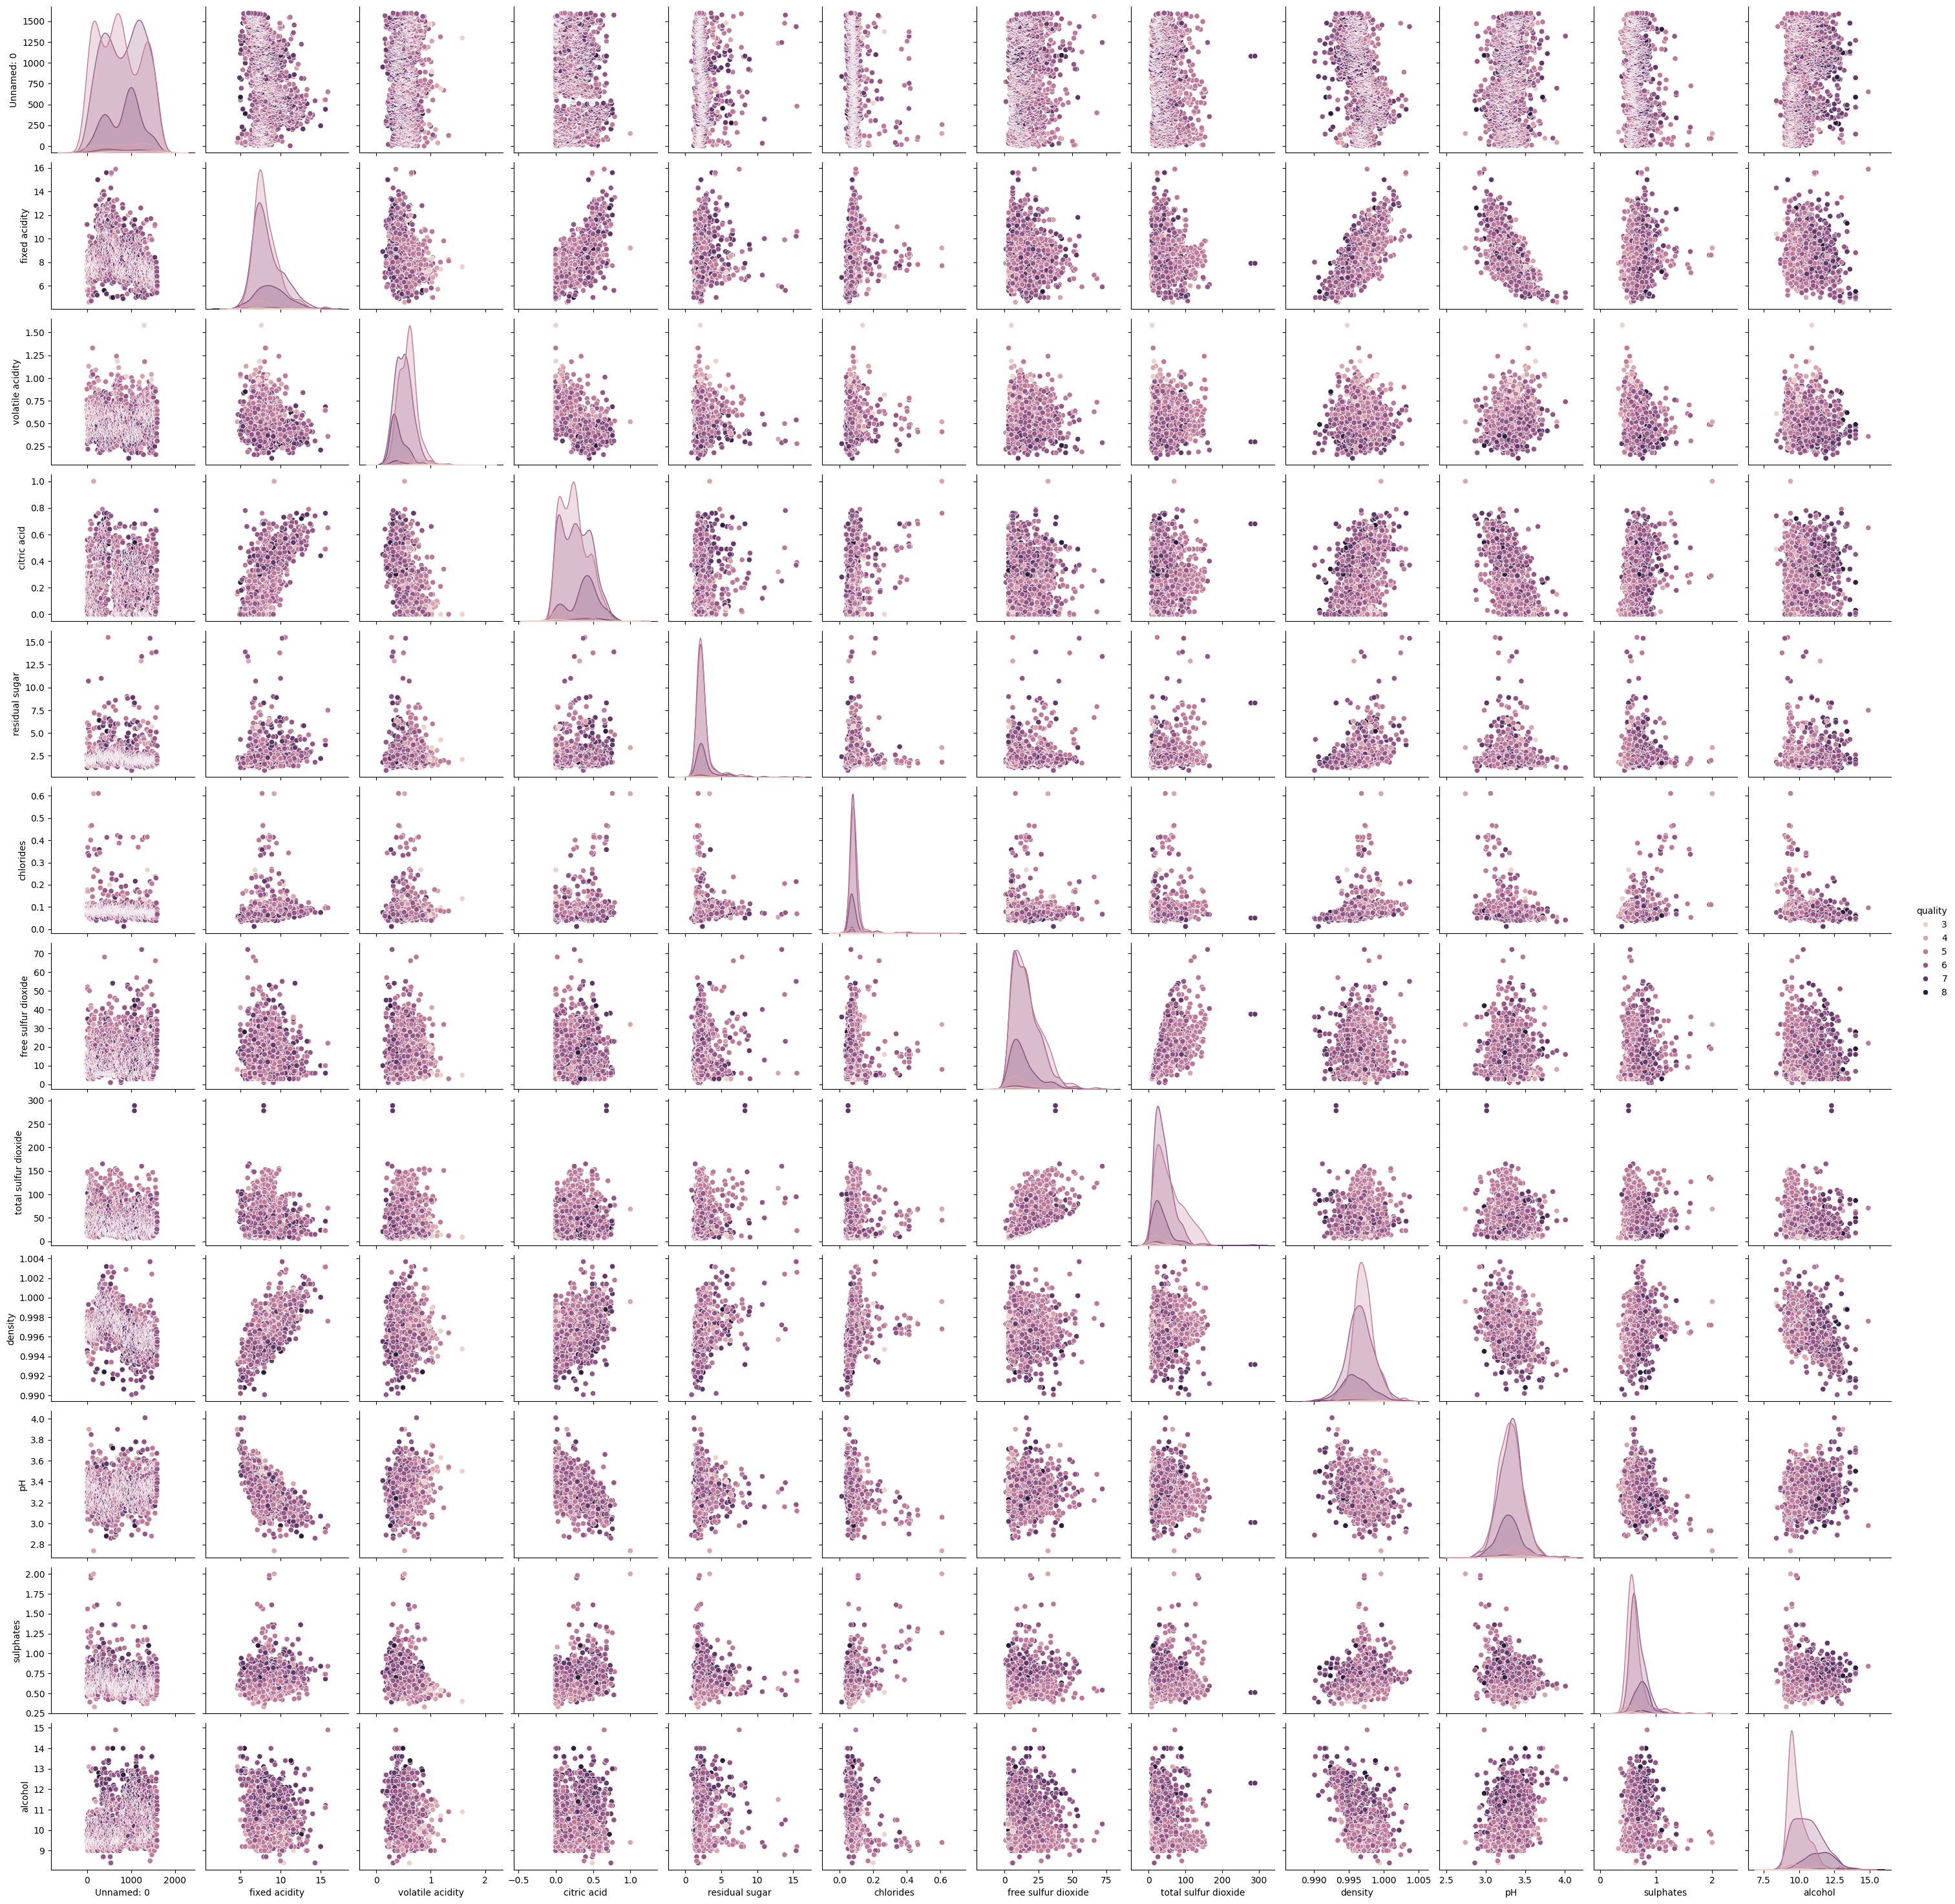

In [22]:
fig = sb.pairplot(data, hue="quality")

In [23]:
## Commit the figure to mlflow 

fig = fig.fig
mlflow.log_figure(fig, "wine-experiment-1.png")

In [143]:
## Default Values
alpha = 0.7
l1_ratio = 0.7

In [144]:
## Commiting params to mlflow

mlflow.log_param("alpha", alpha)
mlflow.log_param("l1_ratio", l1_ratio)

0.7

In [145]:
# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

In [146]:
# The predicted column is "quality" which is a scalar from [3, 9]
train_x = train.drop(["quality"], axis=1)
test_x = test.drop(["quality"], axis=1)
train_y = train[["quality"]]
test_y = test[["quality"]]

In [147]:
## Train the model

lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
lr.fit(train_x, train_y)

ElasticNet(alpha=0.7, l1_ratio=0.7, random_state=42)

In [148]:
## Get the Evaluation Metric

predicted_qualities = lr.predict(test_x)
(rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

In [149]:
## Commit the evaluation metric to mlflow

mlflow.log_metric("rmse", rmse)
mlflow.log_metric("r2", r2)
mlflow.log_metric("mae", mae)

In [151]:
## Commit the model to mlflow & stop mlflow run

mlflow.sklearn.log_model(lr, "TestModel")

mlflow.end_run()

2024/05/01 23:43:09 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/5m/0rlnglw521d38d130zdyx46h0000gq/T/tmp8y5pgvwq/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 


OSError: [Errno 30] Read-only file system: '/root'